<a href="https://colab.research.google.com/github/rakeshsurampalli/smart_investment/blob/master/t_test%2Ccorrelation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt


In [4]:
gld = pdr.get_data_yahoo("GLD","2018-11-08")
gld.head(10)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-11-08,116.150002,115.500000,115.769997,115.779999,7638800,115.779999
2018-11-09,114.750000,114.139999,114.599998,114.480003,14159200,114.480003
2018-11-12,114.050003,113.580002,114.010002,113.660004,7498600,113.660004
2018-11-13,113.930000,113.419998,113.720001,113.699997,9309000,113.699997
2018-11-14,115.059998,113.459999,113.529999,114.639999,13950200,114.639999
2018-11-15,114.989998,114.559998,114.830002,114.769997,8910600,114.769997
2018-11-16,115.879997,115.370003,115.830002,115.620003,8577000,115.620003
2018-11-19,115.919998,115.370003,115.449997,115.669998,8508300,115.669998
2018-11-20,115.949997,115.370003,115.940002,115.669998,9075100,115.669998


In [0]:
gld_close = pd.DataFrame(gld.Close)
gld_open = pd.DataFrame(gld["Open"])

In [8]:
gld_mean = np.mean(gld_close)
gld_mean.head()

Close    132.930724
dtype: float64

In [0]:
gld_sample = gld_close.sample(10)

1 SAMPLE T TEST

In [0]:
from scipy.stats import ttest_1samp

In [20]:
ttest,p_value = ttest_1samp(gld_sample,132.9)
print(p_value)


[0.30723579]


In [21]:
if p_value < 0.05:
  print("we are rejecting null hypotisis")
else:
  print("we are accepting null hypotisis")

we are accepting null hypotisis


2 SAMPLE T TEST

In [48]:
from scipy.stats import ttest_ind
_,p_value = ttest_ind(a = gld_open,b = gld_close,equal_var=False)
print(p_value)

[0.98360928]


In [46]:
if p_value < 0.05:
  print("we are rejecting null hypotisis")
else:
  print("we are accepting null hypotisis")

we are accepting null hypotisis


CORRELATIION


In [26]:
gld_correlation = gld.corr()
gld.corr()

,High,Low,Open,Close,Volume,Adj Close
High,1.000000,0.996937,0.998319,0.998458,0.392144,0.998458
Low,0.996937,1.000000,0.997719,0.998546,0.333202,0.998546
Open,0.998319,0.997719,1.000000,0.996719,0.371316,0.996719
Close,0.998458,0.998546,0.996719,1.000000,0.358688,1.000000
Volume,0.392144,0.333202,0.371316,0.358688,1.000000,0.358688
Adj Close,0.998458,0.998546,0.996719,1.000000,0.358688,1.000000


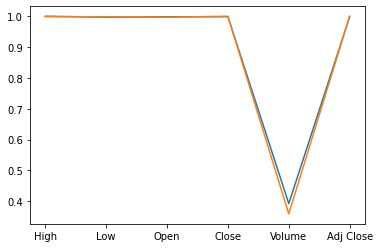

In [31]:
plt.plot(gld_correlation["High"])
plt.plot(gld_correlation["Adj Close"])